In [1]:
import tellurium as te
import seaborn as sns
import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
import model_data
#import fit_data
import numpy as np
%matplotlib inline 



In [14]:
#print(plt.style.available)
plt.style.library['seaborn']['grid.color'] = u'#DFDFDF'
plt.style.library['seaborn']['grid.linewidth'] = 1.0

plt.style.library['seaborn']['axes.facecolor'] = u'white'#4C72B0'
plt.style.library['seaborn']['axes.linewidth'] = 1.0#4C72B0'
plt.style.library['seaborn']['axes.edgecolor'] = u'black'

plt.style.library['seaborn']['xtick.major.size'] = 3
plt.style.library['seaborn']['xtick.top']=True
plt.style.library['seaborn']['ytick.major.size'] = 3
plt.style.library['seaborn']['ytick.right']=True

plt.style.use(u'seaborn')
plt.style.use(u'seaborn-colorblind')
plt.style.library['seaborn']



RcParams({u'axes.axisbelow': True,
          u'axes.edgecolor': u'black',
          u'axes.facecolor': u'white',
          u'axes.grid': True,
          u'axes.labelcolor': u'.15',
          u'axes.labelsize': 11.0,
          u'axes.linewidth': 1.0,
          u'axes.prop_cycle': cycler(u'color', [u'#4C72B0', u'#55A868', u'#C44E52', u'#8172B2', u'#CCB974', u'#64B5CD']),
          u'axes.titlesize': 12.0,
          u'figure.facecolor': u'white',
          u'figure.figsize': [8.0, 5.5],
          u'font.family': [u'sans-serif'],
          u'font.sans-serif': [u'Arial',
                               u'Liberation Sans',
                               u'DejaVu Sans',
                               u'Bitstream Vera Sans',
                               u'sans-serif'],
          u'grid.color': u'#DFDFDF',
          u'grid.linestyle': u'-',
          u'grid.linewidth': 1.0,
          u'image.cmap': u'Greys',
          u'legend.fontsize': 10.0,
          u'legend.frameon': False,
          u'le

In [3]:
def get_paras_dic(modeltxt):
    dic={}
    model_file=open(modeltxt,'rb')
    print(model_file)
    for line in model_file:
        linespl = line.split()
        
        if (len(linespl)>=5):
            if (linespl[1] == '=') & ~(str(linespl[0]).startswith('//')) & ~(str(linespl[0]).endswith("'")):
                dic[linespl[0]] = linespl[2][0:-1] + ' ' +  linespl[4]  
    return dic

In [4]:
#seconds [0] or minutes [1]
def time_in_s_or_min(time_array, scale='min'):
    
    xmax=max(time_array)
    
    if scale == 'min':
        time = time_array/60
        xlim=(-10,xmax/60)
    elif scale == 's': 
        time = time_array
        xlim=(-200, xmax)
    else: 
        print('choose time scale')
        time=0
        xlim=(-1,1)
    
    return time, xlim

In [240]:
def plot_details(sim,
                 time,
                 var,
                 ax,
                 title='',
                 max_y=0,
                 scale='min',
                 xlim=(-1,+1),
                 ylabel='',
                 label='',
                 scale_values=1,
                 color=[]):
    
    
    
    max_y_simu = max(sim[var])*1.1

    if max_y < max_y_simu:
          max_y = max_y_simu
    
    if label=='':
         label= var        
    if color!=[]:
        ax.plot(time, sim[var]*scale_values, label = label, color=color)
    else:
        ax.plot(time, sim[var]*scale_values, label = label)    
    #if var.startswith('V'):
       # ylabel='volume, fL'

    ax.set_ylabel(ylabel)
    #ax.plot(time, sim[var]*scale_values, label = label)
    ax.set_title(title)
    ax.set_xlim(xlim[0], xlim[1])#end_time)
    ax.set_ylim(0, max_y*scale_values)
    ax.set_xlabel('time, ' + scale)
    ax.legend(frameon=False)
    
    return max_y
    

In [230]:
def plot_sens(model, ax, para_name, values,
              end_time=3600,
              steps=1000,
              scale='min',
              selections=['time','V_total_fl'],
              additional_model_paras={},
              legend=True,
              colormap=sns.color_palette('colorblind')):

    max_y=0
    
    for k,value in enumerate(para_2change_dic[para_name][1]):
        
        changed_para={}
        changed_para[para_2change_dic[para_name][0]]=value
        model.resetToOrigin()
        model.integrator.relative_tolerance= 1e-10
        model = model_data.set_model_parameters(model, additional_model_paras)
        model = model_data.set_model_parameters(model,changed_para)
              
        sim = model.simulate(1, end_time, steps, selections=observables)
        time, xlim  = time_in_s_or_min(sim['time'], scale='min')
        
        max_y = plot_details(sim, time, var, ax, scale='min', xlim=xlim, max_y=max_y, color=colormap[k])
    if legend:
        ax.legend(values,
                  frameon=False,
                  title=r'$'+para_name.split('_')[0] +'_{'+ para_name.split('_')[1] +'}'+ '$, $s^{-1} um^{-2}$',
                  loc=(1.1,0))
    
    

In [7]:
def print_model_parameters(modeltxt, ax, fontsize=9):
    paras_dic = {}
    paras_dic = get_paras_dic(modeltxt)

    for pos,key in enumerate(paras_dic):
        ax.text(0.8,
                1./len(paras_dic)*(pos+1),
                key  + ' : ' + paras_dic[key],
                fontsize=fontsize,
                transform=ax.transAxes)

    plt.tight_layout()
    

In [8]:
def add_plot_label(k, ax, pos=(0.05, 0.9), caps=True):
    if caps:
        plotlabel=['A','B','C','D','E','F','G','H','I']
    else:
        plotlabel=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
    ax.text(pos[0],pos[1], plotlabel[k], fontsize=12, transform=ax.transAxes)

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning:

elementwise != comparison failed; this will raise an error in the future.



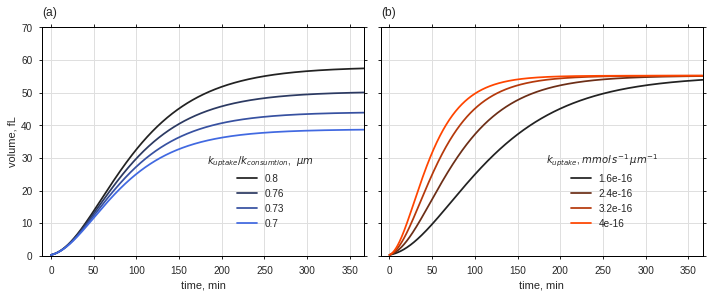

In [243]:
modeltxt='volume_reference_radius.txt'
model=te.loadAntimonyModel(modeltxt)

model_species=['time','V_tot_fl', '[c_e]', '[c_i]','pi_i','pi_e', 'R_ref', 'r','r_os', 'r_b', 'pi_t', 'V_ref']
end_time = 22000
steps = 1000
num=4


#sensitivity 
para_2change_dic={r'$k_{uptake}$':['k_nutrient',
                                   np.linspace(1.6,4.0, num=num)*1e-16,
                                   np.linspace(1.6,4.0, num=num)*1e-16,
                                   r'$mmol \, s^{-1} \, \mu m^{-1}$'],
                  r'$k_{uptake}/k_{consumtion}$':['k_scaling_factor',
                                                  np.linspace(10./8.,10./7., num=num),
                                                  (1/np.linspace(10./8.,10./7., num=num)).round(decimals=2),
                                                 r' $\mu m$']}


#model
observables = ['time','V_tot_fl','r']#model_species
number_of_observables = len(observables)-1
number_of_paras = len(para_2change_dic.keys())
var=observables[1]

#specification
additional_model_paras={'withSF':1}

# Plot
subplots=len(para_2change_dic)
fig1, ax=plt.subplots(1, subplots, sharey=True)
fig1.set_size_inches(10,4)
para_name = para_2change_dic.keys()[0]

#colors
bp=sns.dark_palette('royalblue',num)
op=sns.dark_palette('orangered',num)
#list(sns.cm.colors.cnames.keys())
colors=[bp,op]

for k, para_name in enumerate(para_2change_dic.keys()):
        
    if subplots == 1:
        ax_k=ax
        
    else:
        ax_k=ax[k]
        
    #ax_k[-1] .axis('off') 
    values=para_2change_dic[para_name][1]
    para_name_model=para_2change_dic[para_name][0]
    
    plot_sens(model,
              ax_k,
              para_name,
              values,
              end_time=end_time,
              steps=steps,
              scale='min',
              additional_model_paras=additional_model_paras,
              colormap=colors[k])
    
                      
    ax_k.legend(para_2change_dic[para_name][2],
                title=para_name+', '+para_2change_dic[para_name][3],
                loc=(0.5,0.1),
                frameon=False,
                ncol=1)
    plt.ylim(0,70)
    add_plot_label(k, ax_k, pos=(0.0, 1.05),  caps=False)
   
#print_model_parameters(modeltxt, ax_k, fontsize=9)
ax[0].set_ylabel('volume, fL')   
plt.savefig('plots/diss_parameter_sensitivity.png',dpi=600)
plt.tight_layout()

In [252]:
c_names=['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']

array([ 0.14112001,  0.04057141, -0.06039078, -0.16073733, -0.25944526,
       -0.35550831, -0.44794718, -0.53581951, -0.6182295 , -0.69433703,
       -0.76336624, -0.8246134 , -0.87745416, -0.92134982, -0.9558529 ,
       -0.98061167, -0.99537372, -0.99998856, -0.99440916, -0.97869237,
       -0.95299844, -0.91758929, -0.8728259 , -0.8191646 , -0.75715244,
       -0.68742158, -0.61068289, -0.52771868, -0.43937471, -0.34655159,
       -0.2501956 , -0.15128902, -0.05084015,  0.05012701,  0.15058315,
        0.2495042 ,  0.34588171,  0.43873317,  0.52711202,  0.6101173 ,
        0.68690282,  0.7566858 ,  0.81875485,  0.8724772 ,  0.91730521,
        0.95278186,  0.97854551,  0.9943335 ,  0.99998489,  0.99544207,
        0.98075134,  0.95606248,  0.92162716,  0.87779643,  0.82501713,
        0.76382729,  0.69485072,  0.61879059,  0.53642227,  0.44858547,
        0.35617562,  0.26013479,  0.16144205,  0.06110351, -0.03985794,
       -0.14041307, -0.23953677, -0.33621855, -0.42947279, -0.51

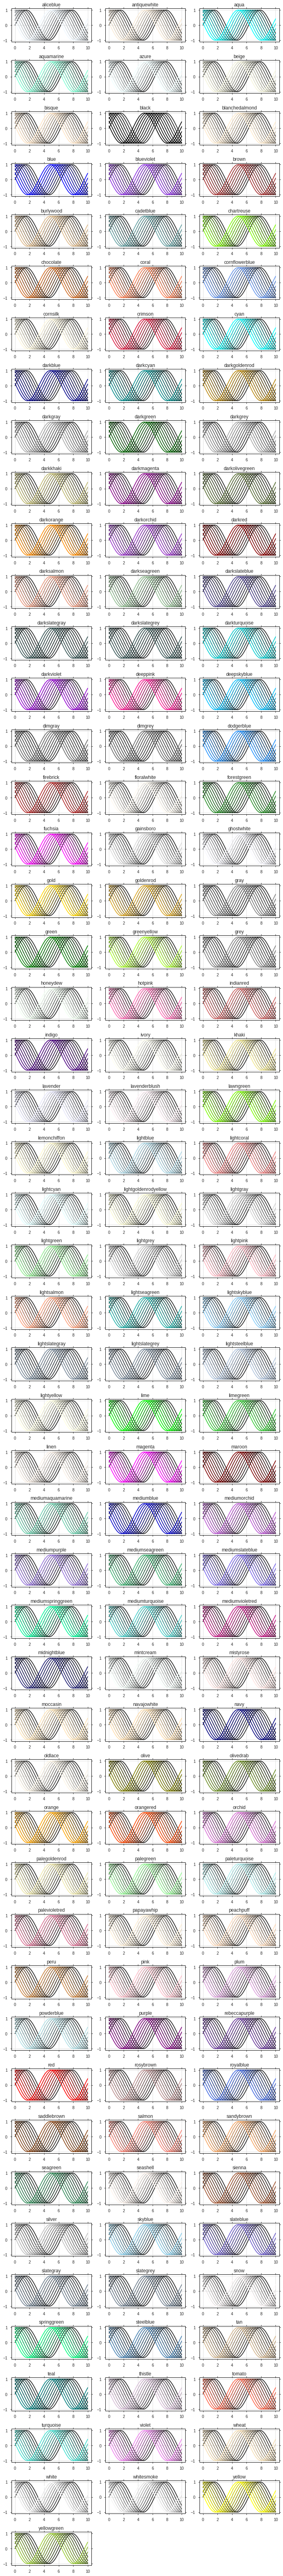

In [275]:
a=1
#b=0
num=10
l=len(c_names)

x=np.linspace(0,10,100)
para1=np.linspace(0,3,num)

plt.figure(1, figsize=(10,90))


for i,name in enumerate(c_names):
    
    plt.subplot((l/3)+1, 3, i+1)
    plt.title(name)
    
    colors=sns.dark_palette(c_names[i],num)
        
    
    for k,b in enumerate(para1):
        y=np.sin(a*x+b)
        plt.plot(x,y,color=colors[k])

plt.tight_layout()        
plt.savefig('/home/bjoern/Desktop/test.png')

<open file 'volume_reference_radius.txt', mode 'rb' at 0x7fd6b31c5e40>


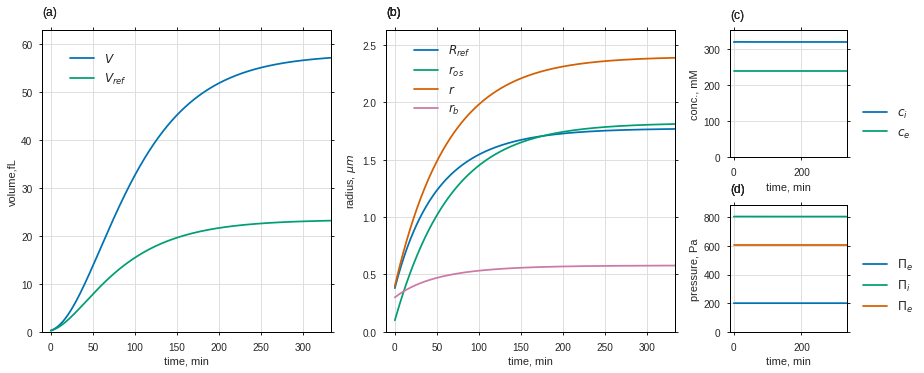

In [242]:
#Plot Grid
import matplotlib.gridspec as gridspec
gs=gridspec.GridSpec(2, 5)
ax=[]
ax.append(plt.subplot(gs[:,0:2]))
ax.append(plt.subplot(gs[:,2:4]))
ax.append(plt.subplot(gs[0,4]))
ax.append(plt.subplot(gs[1,4]))
####

#model
modeltxt='volume_reference_radius.txt'
model=te.loadAntimonyModel(modeltxt)
model_species=['time','V_tot_fl', '[c_e]', '[c_i]','pi_i','pi_e', 'R_ref', 'r','r_os', 'r_b', 'pi_t', 'V_ref']
model_species_names=[r't',r'$V_{tot}', r'$c_e$', r'$c_i$',r'$\Pi_i$',r'$\Pi_e$', r'$R_{ref}$', r'$r$',r'$r_{os}$', r'$r_b$', r'$\Pi_t$', r'$V_{ref}$']

model_species={'time':r't' ,
               'V_tot_fl':r'$V$',
               '[c_e]': r'$c_e$',
               '[c_i]': r'$c_i$',
               'pi_i' : r'$\Pi_i$',
               'pi_e' : r'$\Pi_e$',
               'R_ref': r'$R_{ref}$',
               'r'    : r'$r$',
               'r_os' : r'$r_{os}$',
               'r_b'  : r'$r_{b}$',
               'pi_t' : r'$\Pi_e$',
               'V_ref': r'$V_{ref}$'}


end_time = 20000
steps = 1000
sim=model.simulate(1, end_time, steps, selections = model_species.keys())


variables = sim.colnames
number_of_variables = len(variables)
paras_dic = {}
paras_dic = get_paras_dic(modeltxt)
time, xlim  = time_in_s_or_min(sim['time'], scale='min')


# Plot
#fig1, ax = plt.subplots(2,2)#, sharex=True)
fig1=plt.figure(1)
fig1.set_size_inches(12,5)

maxy = [0]*4
maxy_s = maxy



for k,var in enumerate(variables):
    
    #subplotlabel position
    pos=(0.0,1.1) #smallplot
    legend_loc=(1.1, 0.1)  
    scale_values=1
   
    if var == 'time':
        continue
    if var.startswith('V'):
        plotnumb=0
        ylabel='volume,fL'
        pos=(0.0,1.05)
        legend_loc=(0.08, 0.8)
               
    elif var.startswith('[c'):
        plotnumb=2
        ylabel='conc., mM'
            
#     elif var.startswith('r_'):
#         plot_details(sim, time, var,   max_y=3, ax=ax[1][0], scale='min', xlim=xlim, ylabel=r'radius, ${\mu} m$')
#         add_plot_label(2, ax=ax[1][0],pos=pos)
    elif var in ['r', 'R_ref', 'r_os', 'r_b']:
        plotnumb=1
        ylabel=r'radius, ${\mu} m$'
        pos=(0.0,1.05)
        legend_loc=(0.08, 0.7)

    elif var.startswith('p'):
        plotnumb=3
        scale_values=0.001
        ylabel=r'pressure, Pa'
        

    else:
        pass
    
    maxy_s=max(sim[var])*1.1
    #print(' maxy_S :{0} , maxy:{1} , variabl:{2}'.format(maxy_s,maxy[plotnumb],var)) # control for max values
    
    if (maxy[plotnumb]<maxy_s):
            maxy[plotnumb]=maxy_s

    plot_details(sim, time, var, ax[plotnumb],
                 title=' ',
                 max_y= maxy[plotnumb],
                 scale='min',
                 xlim=xlim,
                 ylabel=ylabel,
                 label=model_species[var],
                 scale_values=scale_values)
    add_plot_label(plotnumb, ax[plotnumb], pos=pos, caps=False)
    ax[plotnumb].legend(loc=legend_loc, fontsize='large')


#ax[-1][-1].axis('off')

#for pos,key in enumerate(paras_dic):
 #   ax[-1][-1].text(0.1, 1./len(paras_dic)*(pos+1)-1.5, key  + ' : ' + paras_dic[key], fontsize=9, transform=ax[-1][-1].transAxes)
   
    plt.tight_layout()

plt.savefig('plots/diss_simulation__refradius_osmo.png',dpi=600)


In [91]:
   if var == 'time':
        continue
    if var.startswith('V'):
        plotnumb=0
        ylabel='volume,fL'
        plot_details(sim, time, var, ax[plotnumb], title=' ', max_y=70,  scale='min', xlim=xlim, ylabel='volume, fL')
        add_plot_label(plotnumb, ax=ax_1, pos=pos)
    elif var.startswith('[c'):
        plotnumb=1
        plot_details(sim, time, var, ax_2, title=' ',max_y=400, scale='min', xlim=xlim, ylabel='conc., mM')
        add_plot_label(1, ax=ax_2, pos=pos)    
#     elif var.startswith('r_'):
#         plot_details(sim, time, var,   max_y=3, ax=ax[1][0], scale='min', xlim=xlim, ylabel=r'radius, ${\mu} m$')
#         add_plot_label(2, ax=ax[1][0],pos=pos)
    elif var in ['r', 'R_ref', 'r_os', 'r_b']:
        plotnumb=2
        plot_details(sim, time, var,  ax_3, title=' ',max_y=3, scale='min', xlim=xlim, ylabel=r'radius, ${\mu} m$')
        add_plot_label(3, ax=ax_3, pos=pos)
    elif var.startswith('p'):
        plotnumb=3
        max_y = plot_details(sim, time, var, ax_4, title=' ',max_y=max_y, scale='min', xlim=xlim, ylabel=r'pressure, Pa')
        add_plot_label(4, ax=ax_4, pos=pos, caps=False)
    else:
        pass
    
    add_plot_label(plotnumb, ax=ax_4, pos=pos, caps=False)
    


IndentationError: unindent does not match any outer indentation level (<ipython-input-91-75e2ef92849d>, line 3)

In [194]:
maxy[plotnumb]*scale_values

885.4541170678501